In [1]:
import os
os.environ['HTTP_PROXY'] = 'https://proxy.jpmchase.net:8080'
os.environ['HTTPS_PROXY'] = 'https://proxy.jpmchase.net:8443'

In [2]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

C:\FAST\anaconda\2.5.0\lib\site-packages\fix_yahoo_finance\__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and will be removed in future versions.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


In [4]:
juesx = web.get_data_yahoo('JUESX', start = '2017-01-01')
spy = web.get_data_yahoo('SPY', start = '2017-01-01')

[*********************100%***********************]  1 of 1 downloaded

In [6]:
spy.iloc[0]['Adj Close']

223.17601000000002

C:\FAST\anaconda\2.5.0\lib\site-packages\dateutil\rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


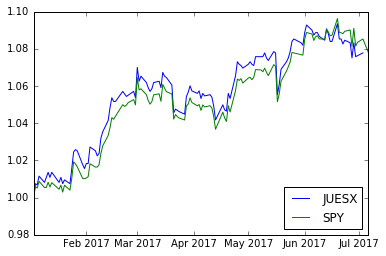

In [7]:
plt.plot(juesx['Adj Close'] / juesx.iloc[0]['Adj Close'], label = 'JUESX')
plt.plot(spy['Adj Close'] / spy.iloc[0]['Adj Close'], label = 'SPY')
plt.legend(loc = 'lower right')
plt.show()

In [8]:
100*(juesx.iloc[len(juesx)-1]['Adj Close'] / juesx.iloc[0]['Adj Close'] - 1)

7.7806460275240186

In [9]:
100*(spy.iloc[len(spy)-1]['Adj Close'] / spy.iloc[0]['Adj Close'] - 1)

7.7983256354480002

In [10]:
jemsx = web.get_data_yahoo('JEMSX', start = '2017-01-01')

[*********************100%***********************]  1 of 1 downloaded

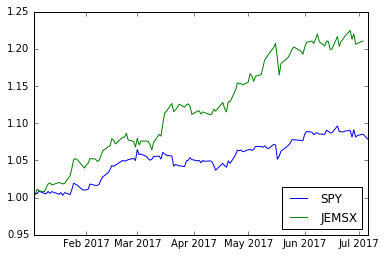

In [11]:
plt.plot(spy['Adj Close'] / spy.iloc[0]['Adj Close'], label = 'SPY')
plt.plot(jemsx['Adj Close'] / jemsx.iloc[0]['Adj Close'], label = 'JEMSX')

plt.legend(loc = 'lower right')
plt.show()

In [12]:
jpmHist = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Personal Investing/jpmorganfundsHistory.csv')

In [13]:
jpmHist.head(1)

,Account Number,Trade Date,Confirmation Date,Fund Name,Fund Symbol,Fund Code,Transaction Description,Shares,Offering Price,Gross Amount
0,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,07/03/2017,07/03/2017,Emerging Markets Equity Fund - I,JEMSX,1235.0,PERIODIC PURCHASE -ACH,5.848,25.65,150.0


In [14]:
jpmHist = jpmHist.loc[jpmHist[' Fund Symbol']==' JEMSX']

In [15]:
jpmHist.columns = [x.strip().replace(' ', '_') for x in jpmHist.columns]

In [16]:
del(jpmHist['Account_Number'])

In [17]:
jpmHist.index = pd.to_datetime(jpmHist['Trade_Date'])

In [18]:
jemsx = web.get_data_yahoo('JEMSX', start = '2016-11-23')
jemsx = jemsx['Adj Close']

[*********************100%***********************]  1 of 1 downloaded

In [19]:
df = pd.concat([jpmHist, jemsx], axis = 1)

In [20]:
df['Total Shares'] = df['Shares'].cumsum()
df['Total Shares'].fillna(method = 'pad', inplace = True)

In [21]:
df['MV'] = df['Total Shares'] * df['Adj Close']

In [22]:
df['Money in'] = df['Gross_Amount'].cumsum()
df['Money in'].fillna(method = 'pad', inplace = True)

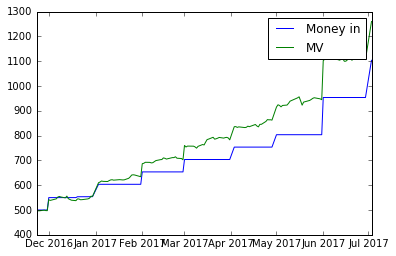

In [23]:
plt.plot(df['Money in'], label = 'Money in')
plt.plot(df['MV'], label = 'MV')
plt.legend()
plt.show()

In [24]:
df.to_csv('H:/GIM Strategy and Execution/data.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151 entries, 2016-11-23 to 2017-07-03
Data columns (total 13 columns):
Trade_Date                 11 non-null object
Confirmation_Date          11 non-null object
Fund_Name                  11 non-null object
Fund_Symbol                11 non-null object
Fund_Code                  11 non-null float64
Transaction_Description    11 non-null object
Shares                     11 non-null float64
Offering_Price             11 non-null float64
Gross_Amount               11 non-null float64
Adj Close                  151 non-null float64
Total Shares               151 non-null float64
MV                         151 non-null float64
Money in                   151 non-null float64
dtypes: float64(8), object(5)
memory usage: 16.5+ KB


In [33]:
change = df[['MV' ,'Money in']]
change = change.pct_change(1).dropna()

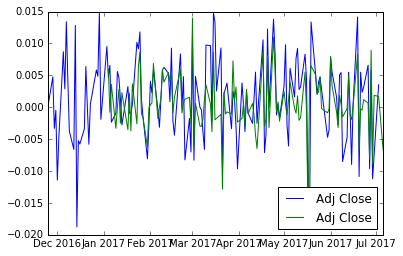

In [44]:
plt.plot(jemsx.pct_change(1).dropna())
plt.plot(spy['Adj Close'].pct_change(1).dropna())
plt.legend(loc = 'lower right')

In [45]:
emRet = jemsx.pct_change(1).dropna()
spyRet = spy['Adj Close'].pct_change(1).dropna()

In [47]:
emRet = pd.DataFrame(emRet)

In [55]:
emRet.corrwith(spyRet)

Adj Close    0.651926
dtype: float64

C:\FAST\anaconda\2.5.0\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10).corr(other=<DataFrame>)
  if __name__ == '__main__':


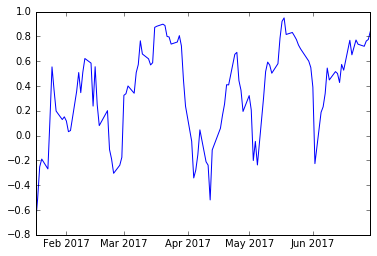

In [59]:
corr = pd.rolling_corr(emRet, spy, 10)
plt.plot(corr)

In [60]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,223.176010,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,224.503738,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,224.325378,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,225.127960,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,224.384842,46265300


In [61]:
spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-28,242.500000,243.720001,242.229996,243.490005,243.490005,70042600
2017-06-29,243.660004,243.720001,239.960007,241.350006,241.350006,103933000
2017-06-30,242.279999,242.710007,241.580002,241.800003,241.800003,86820700
2017-07-03,242.880005,243.380005,242.210007,242.210007,242.210007,39147200
2017-07-06,241.889999,242.029999,240.339996,240.580002,240.580002,58835528


In [62]:
240.58002/224.38

1.072199037347357

In [104]:
import quandl as qd
token = 'xctpYxnt6ybGXRUihmLT'
GLD = qd.get("LBMA/GOLD", authtoken=token)

In [105]:
GLD = GLD['USD (AM)']

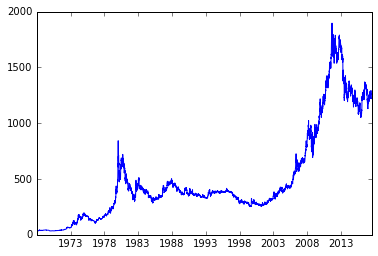

In [106]:
plt.plot(GLD)

In [81]:
GLD.loc[GLD.index == '2017-07-07'].values[0]/ GLD.loc[GLD.index == '2016-07-07'].values[0] - 1

-0.107307439104674

In [102]:
GLD.loc[GLD.index == '2017-07-07'].values[0]/ GLD.loc[GLD.index == '2017-01-03'].values[0] - 1

0.062464632394550135

In [109]:
sp500 = web.get_data_yahoo('^GSPC', '1970-01-01')

[*********************100%***********************]  1 of 1 downloaded

In [110]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11988 entries, 1970-01-02 to 2017-07-07
Data columns (total 6 columns):
Open         11988 non-null float64
High         11988 non-null float64
Low          11988 non-null float64
Close        11988 non-null float64
Adj Close    11988 non-null float64
Volume       11988 non-null int32
dtypes: float64(5), int32(1)
memory usage: 608.8 KB


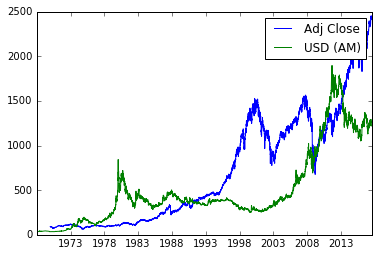

In [111]:
plt.plot(sp500['Adj Close'])
plt.plot(GLD)
plt.legend()
plt.show()

In [112]:
max(GLD)

1896.5

In [115]:
GLD.loc[GLD== max(GLD)]

Date
2011-09-05    1896.5
Name: USD (AM), dtype: float64

In [116]:
sp500 = sp500['Adj Close']

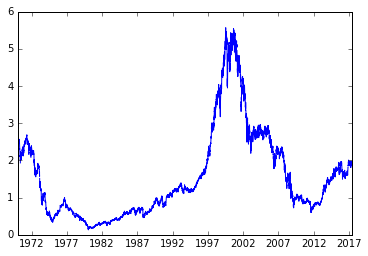

In [118]:
plt.plot(sp500/GLD)

In [119]:
BTC = qd.get("BCHAIN/MKPRU", authtoken=token)

In [126]:
pd.rolling_corr(BTC['Value'], sp500,10)

C:\FAST\anaconda\2.5.0\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10).corr(other=<Series>)
  if __name__ == '__main__':


Date
1970-01-02   NaN
1970-01-05   NaN
1970-01-06   NaN
1970-01-07   NaN
1970-01-08   NaN
1970-01-09   NaN
1970-01-12   NaN
1970-01-13   NaN
1970-01-14   NaN
1970-01-15   NaN
1970-01-16   NaN
1970-01-19   NaN
1970-01-20   NaN
1970-01-21   NaN
1970-01-22   NaN
1970-01-23   NaN
1970-01-26   NaN
1970-01-27   NaN
1970-01-28   NaN
1970-01-29   NaN
1970-01-30   NaN
1970-02-02   NaN
1970-02-03   NaN
1970-02-04   NaN
1970-02-05   NaN
1970-02-06   NaN
1970-02-09   NaN
1970-02-10   NaN
1970-02-11   NaN
1970-02-12   NaN
              ..
2017-06-08   NaN
2017-06-09   NaN
2017-06-10   NaN
2017-06-11   NaN
2017-06-12   NaN
2017-06-13   NaN
2017-06-14   NaN
2017-06-15   NaN
2017-06-16   NaN
2017-06-17   NaN
2017-06-18   NaN
2017-06-19   NaN
2017-06-20   NaN
2017-06-21   NaN
2017-06-22   NaN
2017-06-23   NaN
2017-06-24   NaN
2017-06-25   NaN
2017-06-26   NaN
2017-06-27   NaN
2017-06-28   NaN
2017-06-29   NaN
2017-06-30   NaN
2017-07-01   NaN
2017-07-02   NaN
2017-07-03   NaN
2017-07-04   NaN
2017-07-0

In [130]:
btc_sp500 = pd.concat([BTC['Value'], sp500], axis = 1)

In [133]:
btc_sp500.fillna(method = 'pad', inplace = True)

In [142]:
ret = btc_sp500 / btc_sp500.shift(5)

C:\FAST\anaconda\2.5.0\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  if __name__ == '__main__':


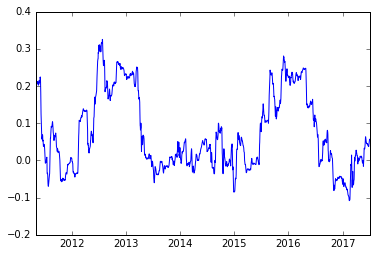

In [143]:
plt.plot(pd.rolling_corr(ret['Value'], ret['Adj Close'], 252))

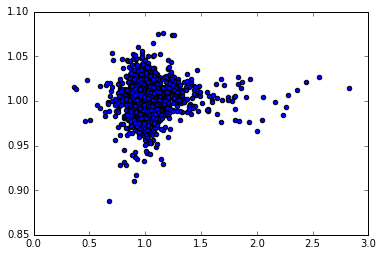

In [146]:
plt.scatter(ret['Value'], ret['Adj Close'])